In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.modelling_utils as utils
import source.models_classification as modl

import numpy as np
import pandas as pd
# Example


Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


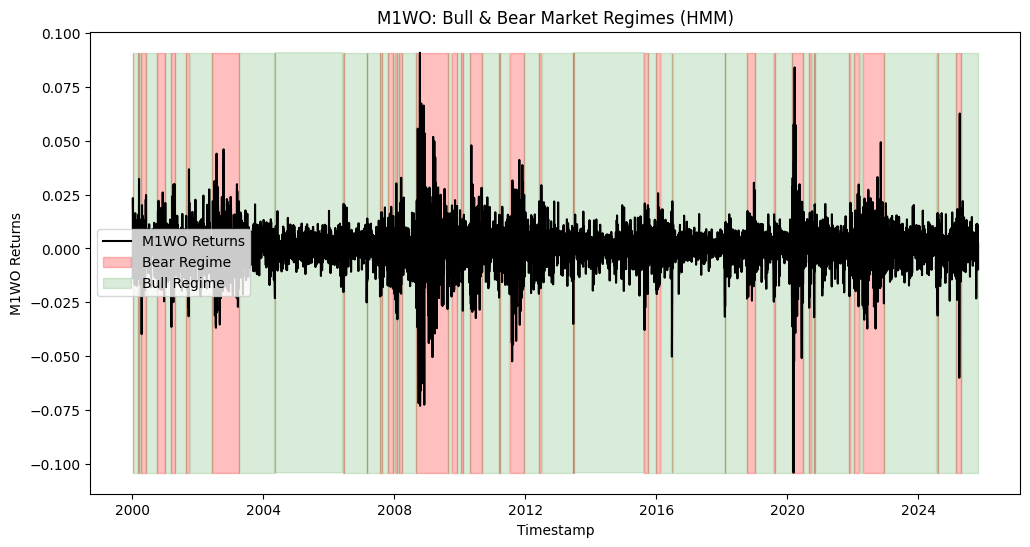

In [2]:
df = dp.create_classification_data(quiet=False)

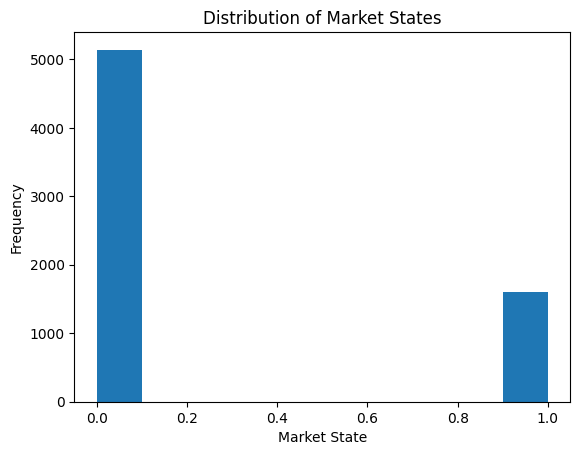

Portion of state 0: 76.28%
Portion of state 1: 23.72%


In [3]:
import matplotlib.pyplot as plt

plt.hist(df['state'])
plt.title('Distribution of Market States')
plt.xlabel('Market State')
plt.ylabel('Frequency')
plt.show()

# pretty unbalanced 
portion_state_0 = len(df[df['state'] == 0]) / len(df)
portion_state_1 = len(df[df['state'] == 1]) / len(df)
print(f"Portion of state 0: {portion_state_0:.2%}")
print(f"Portion of state 1: {portion_state_1:.2%}")

In [7]:
logit_lag_fit_predict = modl.make_logit_multifeature_lag_fit_predict_fn()

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    model_fit_predict_fn=logit_lag_fit_predict,
    start_oos="2020-01-01",
)

print(metrics)

2020-01-01 00:00:00
2020-01-02 00:00:00
2020-01-03 00:00:00
2020-01-06 00:00:00
2020-01-07 00:00:00
2020-01-08 00:00:00
2020-01-09 00:00:00
2020-01-10 00:00:00
2020-01-13 00:00:00
2020-01-14 00:00:00
2020-01-15 00:00:00
2020-01-16 00:00:00
2020-01-17 00:00:00
2020-01-20 00:00:00
2020-01-21 00:00:00
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-24 00:00:00
2020-01-27 00:00:00
2020-01-28 00:00:00
2020-01-29 00:00:00
2020-01-30 00:00:00
2020-01-31 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-02-28 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00


In [ ]:
fit_fn = modl.make_moment_fit_predict_fn(
    feature_cols=["SXXT", "SPX", "NKY", "SPTR", "EUR003M", "FEDL01", "GC1", "V2X", "MOVE", "VIX", "USYC2Y10", "VXJ", "M1WO"],   # or a list of your channels
    target_col="state",
    seq_len=8,
    epochs=30,
    tune_threshold="youden",           # or "majority" or None
    retrain_every=1000,
    batch_size=64,
    use_class_weight=True
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state",
    start_oos="2020-01-01",
    start_date="1850-01-01",
    min_train=256,                     # recommend >= seq_len
    model_name="MOMENT-CLS",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
)


2020-01-01 00:00:00


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: b9cfcdbf-a76f-4c6e-984a-6754450d3160)')' thrown while requesting HEAD https://huggingface.co/AutonLab/MOMENT-1-small/resolve/main/config.json
Retrying in 1s [Retry 1/5].
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/momentfm/models/moment.py:174: UserWarning: Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.
  warnings.warn("Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.")


[MOMENT retrain] Epoch 1/30 | Avg loss = 0.692449
[MOMENT retrain] Epoch 2/30 | Avg loss = 0.683477
[MOMENT retrain] Epoch 3/30 | Avg loss = 0.675782
[MOMENT retrain] Epoch 4/30 | Avg loss = 0.671527
[MOMENT retrain] Epoch 5/30 | Avg loss = 0.671892
[MOMENT retrain] Epoch 6/30 | Avg loss = 0.668668
[MOMENT retrain] Epoch 7/30 | Avg loss = 0.665823
[MOMENT retrain] Epoch 8/30 | Avg loss = 0.664654
[MOMENT retrain] Epoch 9/30 | Avg loss = 0.659024
[MOMENT retrain] Epoch 10/30 | Avg loss = 0.658819
[MOMENT retrain] Epoch 11/30 | Avg loss = 0.654684
[MOMENT retrain] Epoch 12/30 | Avg loss = 0.656026
[MOMENT retrain] Epoch 13/30 | Avg loss = 0.656360
[MOMENT retrain] Epoch 14/30 | Avg loss = 0.653490
[MOMENT retrain] Epoch 15/30 | Avg loss = 0.650309
[MOMENT retrain] Epoch 16/30 | Avg loss = 0.653439
[MOMENT retrain] Epoch 17/30 | Avg loss = 0.651741
[MOMENT retrain] Epoch 18/30 | Avg loss = 0.649715
[MOMENT retrain] Epoch 19/30 | Avg loss = 0.649442
[MOMENT retrain] Epoch 20/30 | Avg loss 

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: e43a1c11-f883-42ef-9376-8403d42b4688)')' thrown while requesting HEAD https://huggingface.co/AutonLab/MOMENT-1-small/resolve/main/config.json
Retrying in 1s [Retry 1/5].
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/momentfm/models/moment.py:174: UserWarning: Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.
  warnings.warn("Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.")


[MOMENT retrain] Epoch 1/30 | Avg loss = 0.697183
[MOMENT retrain] Epoch 2/30 | Avg loss = 0.694373
[MOMENT retrain] Epoch 3/30 | Avg loss = 0.687726
[MOMENT retrain] Epoch 4/30 | Avg loss = 0.676980
[MOMENT retrain] Epoch 5/30 | Avg loss = 0.677473
[MOMENT retrain] Epoch 6/30 | Avg loss = 0.675854
[MOMENT retrain] Epoch 7/30 | Avg loss = 0.674403
[MOMENT retrain] Epoch 8/30 | Avg loss = 0.673604
[MOMENT retrain] Epoch 9/30 | Avg loss = 0.670963
[MOMENT retrain] Epoch 10/30 | Avg loss = 0.672229
[MOMENT retrain] Epoch 11/30 | Avg loss = 0.667728
[MOMENT retrain] Epoch 12/30 | Avg loss = 0.669826
[MOMENT retrain] Epoch 13/30 | Avg loss = 0.666923
[MOMENT retrain] Epoch 14/30 | Avg loss = 0.667354
[MOMENT retrain] Epoch 15/30 | Avg loss = 0.665226
[MOMENT retrain] Epoch 16/30 | Avg loss = 0.666266
[MOMENT retrain] Epoch 17/30 | Avg loss = 0.664626
[MOMENT retrain] Epoch 18/30 | Avg loss = 0.666004
[MOMENT retrain] Epoch 19/30 | Avg loss = 0.666059
[MOMENT retrain] Epoch 20/30 | Avg loss 

In [ ]:

fit_fn = modl.make_moment_fit_predict_fn_improved(
    feature_cols=["VIX", "USYC2Y10", "VXJ", "M1WO"],
    target_col="state",
    seq_len=8,
    epochs=30,
    tune_threshold="youden",           
    retrain_every=1000,
    batch_size=64,
    use_class_weight=False
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state",
    start_oos="2020-01-01",
    start_date="1850-01-01",
    min_train=256,                    
    model_name="MOMENT-CLS",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
)


2020-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/momentfm/models/moment.py:174: UserWarning: Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.
  warnings.warn("Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.")
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/checkpoint.py:85: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


2020-01-02 00:00:00
2020-01-03 00:00:00
2020-01-06 00:00:00
2020-01-07 00:00:00
2020-01-08 00:00:00
2020-01-09 00:00:00
2020-01-10 00:00:00
2020-01-13 00:00:00
2020-01-14 00:00:00
2020-01-15 00:00:00
2020-01-16 00:00:00
2020-01-17 00:00:00
2020-01-20 00:00:00
2020-01-21 00:00:00
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-24 00:00:00
2020-01-27 00:00:00
2020-01-28 00:00:00
2020-01-29 00:00:00
2020-01-30 00:00:00
2020-01-31 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-02-28 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00
2020-03-11 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/momentfm/models/moment.py:174: UserWarning: Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.
  warnings.warn("Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.")
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/checkpoint.py:85: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


2023-11-01 00:00:00
2023-11-02 00:00:00
2023-11-03 00:00:00
2023-11-06 00:00:00
2023-11-07 00:00:00
2023-11-08 00:00:00
2023-11-09 00:00:00
2023-11-10 00:00:00
2023-11-13 00:00:00
2023-11-14 00:00:00
2023-11-15 00:00:00
2023-11-16 00:00:00
2023-11-17 00:00:00
2023-11-20 00:00:00
2023-11-21 00:00:00
2023-11-22 00:00:00
2023-11-23 00:00:00
2023-11-24 00:00:00
2023-11-27 00:00:00
2023-11-28 00:00:00
2023-11-29 00:00:00
2023-11-30 00:00:00
2023-12-01 00:00:00
2023-12-04 00:00:00
2023-12-05 00:00:00
2023-12-06 00:00:00
2023-12-07 00:00:00
2023-12-08 00:00:00
2023-12-11 00:00:00
2023-12-12 00:00:00
2023-12-13 00:00:00
2023-12-14 00:00:00
2023-12-15 00:00:00
2023-12-18 00:00:00
2023-12-19 00:00:00
2023-12-20 00:00:00
2023-12-21 00:00:00
2023-12-22 00:00:00
2023-12-25 00:00:00
2023-12-26 00:00:00
2023-12-27 00:00:00
2023-12-28 00:00:00
2023-12-29 00:00:00
2024-01-01 00:00:00
2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00


In [ ]:

fit_fn = modl.make_moment_fit_predict_fn(
    feature_cols=["SXXT", "SPX", "NKY", "SPTR", "EUR003M", "FEDL01", "GC1", "V2X", "MOVE", "VIX", "USYC2Y10", "VXJ"],   # or a list of your channels
    target_col="state",
    seq_len=8,
    epochs=30,
    tune_threshold="youden",           # or "majority" or None
    retrain_every=1000,
    batch_size=64,
    use_class_weight=True
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state",
    start_oos="2020-01-01",
    start_date="1850-01-01",
    min_train=256,                     # recommend >= seq_len
    model_name="MOMENT-CLS",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
)


In [3]:
df.columns

Index(['timestamp', 'CL1', 'M1WO', 'SXXT', 'SPX', 'NKY', 'SPTR', 'EUR003M',
       'FEDL01', 'GC1', 'V2X', 'MOVE', 'VIX', 'USYC2Y10', 'VXJ', 'state',
       'regime'],
      dtype='object')

In [6]:
from importlib import reload
reload(modl)

<module 'source.models_classification' from 'c:\\Users\\kilia\\Masterarbeit\\source\\models_classification.py'>

In [ ]:
metrics_tabpfn, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn = modl.tabpfn_cls_oos(
    data=df,
    base_cols=['CL1', 'M1WO', 'SXXT', 'SPX', 'NKY', 'SPTR', 'EUR003M',
       'FEDL01', 'GC1', 'V2X', 'MOVE', 'VIX', 'USYC2Y10', 'VXJ'],  # predictors you want to lag
    target_col="state",             # Bull/Bear label
    start_oos="2020-01-01",
    start_date="2000-01-05",
    n_lags=1,
    min_train=120,
    baseline_mode="majority",    # compare to majority baseline
    model_params="2.5",             # or None for V2 default
    quiet=False,
    model_name="TabPFN",
    refit_every = 1_00)

print(metrics_tabpfn)


In [4]:
from importlib import reload
reload(modl)

<module 'source.models_classification' from 'c:\\Users\\kilia\\Masterarbeit\\source\\models_classification.py'>

In [10]:
fit_fn = modl.make_chronos_t5_cls_fit_predict_fn(
    feature_col=["M1WO"],   # or a list of your channels
    target_col="state",
    seq_len=1000,                  # 128 is fine too, but 64 often enough for returns
    epochs=2,                    # 5 is fine IF we retrain often (incremental)
    retrain_every=1500,            # <--- Update weights every 25 steps
    lr=1e-3,                     # Slightly higher LR for MLP
    model_id="amazon/chronos-t5-small",
    return_proba=False,           # Better for analyzing performance
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state",
    start_oos="2020-01-01",
    start_date="1850-01-01",
    min_train=256,                     # recommend >= seq_len
    model_name="MOMENT-CLS",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
)

[Chronos] Loading amazon/chronos-t5-small on cuda...


Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at amazon/chronos-t5-small and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[Chronos Retrain] Step 1 | Epoch 1/2


OutOfMemoryError: CUDA out of memory. Tried to allocate 258.00 MiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 12.08 GiB is allocated by PyTorch, and 462.66 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

(array([1329.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         194.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

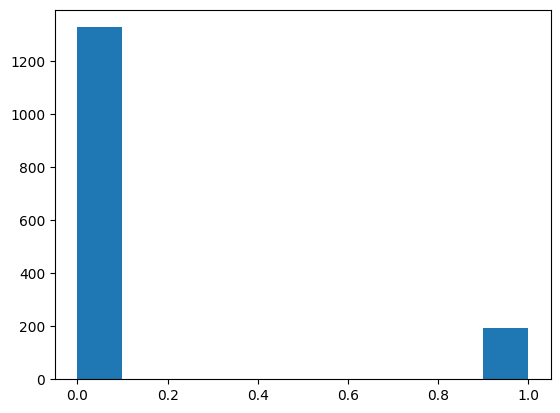

In [11]:
import matplotlib.pyplot as plt
plt.hist(y_pred)

In [14]:
test = df[df.index >= '2020-01-01']
sum(test["state"]) / len(test["state"])

0.25804333552199604

In [6]:
fit_fn = modl.make_chronos_t5_cls_fit_predict_fn(
    feature_col="M1WO",
    target_col="state",
    seq_len=75,                  # 128 is fine too, but 64 often enough for returns
    epochs=5,                    # 5 is fine IF we retrain often (incremental)
    retrain_every=2005,            # <--- Update weights every 25 steps
    lr=1e-3,                     # Slightly higher LR for MLP
    model_id="amazon/chronos-t5-small",
    return_proba=False,           # Better for analyzing performance
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state",
    start_oos="2007-01-01",
    # Ensure start_date gives enough history BEFORE start_oos 
    # so the first training set isn't empty.
    start_date="1850-01-01",
    min_train=200,
    model_name="Chronos-T5-Corrected",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
    quiet=False,
)

2007-01-01 00:00:00
[Chronos] Loading amazon/chronos-t5-small on mps...


Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at amazon/chronos-t5-small and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[Chronos Retrain] Step 1 | Epoch 1/5
[Chronos Retrain] Batch 2 | Loss: 0.6922
[Chronos Retrain] Batch 3 | Loss: 0.6115
[Chronos Retrain] Batch 4 | Loss: 0.4074
[Chronos Retrain] Batch 5 | Loss: 0.3532
[Chronos Retrain] Batch 6 | Loss: 0.6952
[Chronos Retrain] Batch 7 | Loss: 0.4781
[Chronos Retrain] Batch 8 | Loss: 0.5107
[Chronos Retrain] Batch 9 | Loss: 0.3755
[Chronos Retrain] Batch 10 | Loss: 0.4219
[Chronos Retrain] Batch 11 | Loss: 0.3632
[Chronos Retrain] Batch 12 | Loss: 0.2520
[Chronos Retrain] Batch 13 | Loss: 0.5835
[Chronos Retrain] Batch 14 | Loss: 0.5531
[Chronos Retrain] Batch 15 | Loss: 0.3339
[Chronos Retrain] Batch 16 | Loss: 0.2414
[Chronos Retrain] Batch 17 | Loss: 0.2949
[Chronos Retrain] Batch 18 | Loss: 0.1982
[Chronos Retrain] Batch 19 | Loss: 0.3101
[Chronos Retrain] Batch 20 | Loss: 0.1684
[Chronos Retrain] Batch 21 | Loss: 0.4756
[Chronos Retrain] Batch 22 | Loss: 0.2893
[Chronos Retrain] Batch 23 | Loss: 0.5146
[Chronos Retrain] Batch 24 | Loss: 0.3934
[Chro